# Kaggle Competition:  Iceberg or Ship

## Notebook 2:
## run resnet34 architecture

In [1]:
!ls -l

total 476
-rw-rw-r-- 1 ubuntu ubuntu 120926 Jan  8 22:22 1_getdata.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 223609 Jan  8 23:56 2_model_resnet34.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 134887 Jan  8 21:26 baseline.ipynb
-rw-rw-r-- 1 ubuntu ubuntu    185 Jan  8 22:18 README.md


In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split


In [5]:
#!ls /home/nidhin/data/iceberg
!ls -l /home/ubuntu/data/iceberg

total 1973260
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan  8 22:29 models
-rw-rw-r--  1 ubuntu ubuntu     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r--  1 ubuntu ubuntu      38566 Jan  7 20:36 sample_submission.csv.7z
drwxrwxr-x  2 ubuntu ubuntu     274432 Jan  8 21:46 test
-rw-rw-r--  1 ubuntu ubuntu 1521771850 Oct 23 17:27 test.json
-rw-rw-r--  1 ubuntu ubuntu  257127394 Jan  7 20:36 test.json.7z
drwxrwxr-x 14 ubuntu ubuntu       4096 Jan  8 23:54 tmp
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan  8 21:45 train
-rw-rw-r--  1 ubuntu ubuntu  196313674 Oct 23 17:23 train.json
-rw-rw-r--  1 ubuntu ubuntu   44932785 Jan  7 20:36 train.json.7z
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan  8 21:45 valid


In [6]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = "/home/ubuntu/data/iceberg/"

In [7]:
!ls -l {PATH}

total 1973260
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan  8 22:29 models
-rw-rw-r--  1 ubuntu ubuntu     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r--  1 ubuntu ubuntu      38566 Jan  7 20:36 sample_submission.csv.7z
drwxrwxr-x  2 ubuntu ubuntu     274432 Jan  8 21:46 test
-rw-rw-r--  1 ubuntu ubuntu 1521771850 Oct 23 17:27 test.json
-rw-rw-r--  1 ubuntu ubuntu  257127394 Jan  7 20:36 test.json.7z
drwxrwxr-x 14 ubuntu ubuntu       4096 Jan  8 23:54 tmp
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan  8 21:45 train
-rw-rw-r--  1 ubuntu ubuntu  196313674 Oct 23 17:23 train.json
-rw-rw-r--  1 ubuntu ubuntu   44932785 Jan  7 20:36 train.json.7z
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan  8 21:45 valid


## 1) resnet34, `sz=75`
### run default model with original image size
- resnet34 is the one to start with, and probably end with. it is fast and accurate. If you can't get a good result with resnet34, something else is probably wrong  

----> It's true accuracy of ~ 0.75 is pretty good for a first time model

- **Number of Epochs** - how many times do you want your algorithm to go through your images and read them? Start with 1. If that doesn't work, then run more.
- **Learning Rate** - this is the only one that is complex to pick. With gradient descent, can pick out which direction to move downhill and take a small step in that direction. Mathematically, we take the derivative of the function. Learning rate is what do you multiply the derivative by.

## Choose a learning rate

In [8]:
arch=resnet34
sz=75
data  = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [9]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[   0.         1.94689  160.14763    0.53646]             



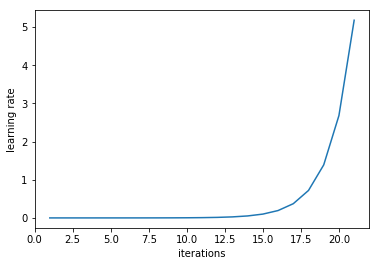

In [10]:
learn.sched.plot_lr()

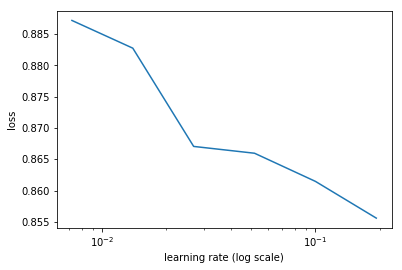

In [11]:
learn.sched.plot()

### precompute=False

In [12]:

# create a learner
learn = ConvLearner.pretrained(arch, data, precompute=False)
learn.fit(0.01, 6)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

[ 0.       0.75508  0.46643  0.77604]                      
[ 1.       0.65084  0.40912  0.81771]                      
[ 2.       0.6196   0.41578  0.79427]                      
[ 3.       0.59421  0.40262  0.81771]                      
[ 4.       0.58294  0.42992  0.82552]                      
[ 5.       0.56092  0.39568  0.83333]                      



### precompute=True

In [13]:
data  = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name='test')

# create a learner
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[ 0.       0.8353   0.49865  0.76302]                     
[ 1.       0.75103  0.50165  0.76562]                     
[ 2.       0.66908  0.44567  0.79167]                      
[ 3.       0.62526  0.43623  0.77865]                      
[ 4.       0.58316  0.40806  0.80729]                     



In [14]:
#lrf=learn.lr_find()

In [15]:
#learn.sched.plot_lr()

In [16]:
#learn.sched.plot()

## Improving model - data augmentation
If you try training for more epochs, you'll notice that we start to *overfit*, which means that our model is learning to recognize the specific images in the training set, rather than generalizaing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through *data augmentation*. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

We can do this by passing `aug_tfms` (*augmentation transforms*) to `tfms_from_model`, with a list of functions to apply that randomly change the image however we wish. For photos that are largely taken from the side (e.g. most photos of dogs and cats, as opposed to photos taken from the top down, such as satellite imagery) we can use the pre-defined list of functions `transforms_side_on`. We can also specify random zooming of images up to specified scale by adding the `max_zoom` parameter.

In [19]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [20]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [21]:
ims = np.stack([get_augs() for i in range(6)])

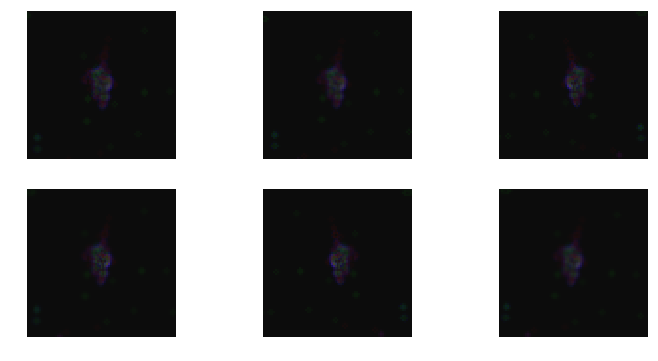

In [22]:
plots(ims, rows=2)


In [23]:
# create a new data object that includes augmentation in the transforms
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [24]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.74313  0.55602  0.78906]                     



In [25]:
learn.precompute=False

In [26]:
learn.fit(1e-2, 4, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

[ 0.       0.6369   0.4642   0.78385]                      
[ 1.       0.61301  0.46768  0.78125]                      
[ 2.       0.60963  0.4995   0.74219]                      
[ 3.       0.62941  0.46663  0.78125]                      
[ 4.       0.64633  0.61842  0.71615]                      
[ 5.       0.60944  0.56978  0.73177]                      
[ 6.       0.60198  0.43637  0.79948]                      
[ 7.       0.58591  0.44646  0.78646]                      



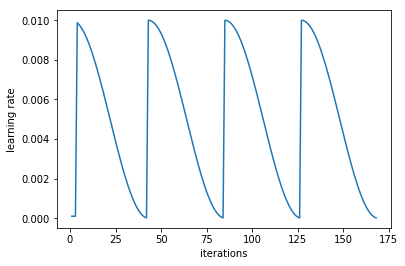

In [27]:
learn.sched.plot_lr()

In [28]:
sz=150
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 5)


100%|██████████| 6/6 [00:01<00:00,  5.52it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[ 0.       0.82022  0.52906  0.75521]                     
[ 1.       0.71406  0.45046  0.79948]                     
[ 2.       0.65477  0.44598  0.78906]                      
[ 3.       0.61044  0.4699   0.78646]                      
[ 4.       0.57422  0.45854  0.80469]                     



In [29]:
sz=150
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.3)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 5)


HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[ 0.       0.74851  0.52915  0.77865]                     
[ 1.       0.62714  0.46133  0.79167]                      
[ 2.       0.61331  0.48226  0.82292]                     
[ 3.       0.58417  0.46668  0.79427]                      
[ 4.       0.56412  0.47685  0.79688]                      



In [30]:
sz=200
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.3)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 5)


HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[ 0.       0.79448  0.4753   0.7474 ]                     
[ 1.       0.6773   0.43598  0.75781]                     
[ 2.       0.61891  0.43777  0.7526 ]                      
[ 3.       0.56005  0.43328  0.76042]                     
[ 4.       0.53163  0.39025  0.78906]                     



In [38]:
sz=250
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.15)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 15)


HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

[ 0.       0.71768  0.45812  0.77604]                     
[ 1.       0.59081  0.43442  0.78385]                      
[ 2.       0.56973  0.40699  0.79427]                      
[ 3.       0.57567  0.45593  0.79167]                     
[ 4.       0.54321  0.37333  0.82292]                     
[ 5.       0.52835  0.3895   0.82552]                      
[ 6.       0.52982  0.44553  0.79948]                     
[ 7.       0.49836  0.41541  0.80469]                     
[ 8.       0.48344  0.38498  0.80208]                     
[ 9.       0.45579  0.35471  0.82812]                     
[ 10.        0.45414   0.38399   0.81771]                 
[ 11.        0.42462   0.40983   0.82552]                 
[ 12.        0.44617   0.36813   0.82552]                 
[ 13.        0.45096   0.40077   0.8099 ]                 
[ 14.        0.42649   0.376     0.82031]                 



In [32]:
sz=300
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.25)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

[ 0.       0.74844  0.55948  0.58073]                     
[ 1.       0.6959   0.49039  0.80729]                     
[ 2.       0.644    0.48945  0.79688]                      
[ 3.       0.58865  0.41913  0.82292]                     
[ 4.       0.53976  0.36452  0.84375]                     



In [46]:
# transforms = top down
sz=350
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 20)

100%|██████████| 6/6 [00:04<00:00,  1.39it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

[ 0.       0.61897  0.48585  0.79427]                     
[ 1.       0.5604   0.37532  0.8099 ]                      
[ 2.       0.55367  0.39825  0.82812]                     
[ 3.       0.56613  0.40228  0.83333]                     
[ 4.       0.5307   0.35779  0.82552]                     
[ 5.       0.5295   0.3536   0.82552]                      
[ 6.       0.50396  0.3472   0.83073]                      
[ 7.       0.48926  0.36424  0.83073]                     
[ 8.       0.47307  0.35414  0.84115]                     
[ 9.       0.46583  0.32324  0.84115]                     
[ 10.        0.45637   0.38688   0.85417]                 
[ 11.        0.46575   0.33224   0.85156]                 
[ 12.        0.44698   0.32958   0.84635]                 
[ 13.        0.42827   0.39059   0.8125 ]                 
[ 14.        0.41616   0.4295    0.81771]                  
[ 15.        0.41004   0.34692   0.82031]                 
[ 16.        0.40226   0.30368   0.83854]           

In [35]:
sz=300
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.001, 20)

HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

[ 0.       0.89811  0.66582  0.66146]                     
[ 1.       0.79593  0.6148   0.5651 ]                     
[ 2.       0.73209  0.58069  0.60156]                     
[ 3.       0.66504  0.55096  0.59375]                     
[ 4.       0.62734  0.54098  0.59375]                     
[ 5.       0.59382  0.512    0.76562]                     
[ 6.       0.56218  0.50094  0.77344]                     
[ 7.       0.54107  0.50097  0.78906]                      
[ 8.       0.54222  0.47884  0.79427]                     
[ 9.       0.52484  0.48452  0.79688]                     
[ 10.        0.51995   0.50241   0.63281]                 
[ 11.        0.48889   0.47393   0.79427]                  
[ 12.        0.49995   0.47213   0.79688]                 
[ 13.        0.49352   0.49357   0.64844]                 
[ 14.        0.48413   0.47261   0.80208]                 
[ 15.        0.47066   0.48002   0.8099 ]                 
[ 16.        0.46425   0.46485   0.80208]             

In [36]:
sz=300
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 20)

HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

[ 0.       0.73921  0.68444  0.60156]                     
[ 1.       0.68056  0.45354  0.82552]                      
[ 2.       0.68815  0.42104  0.83073]                     
[ 3.       0.61453  0.46441  0.80729]                     
[ 4.       0.58373  0.39951  0.83594]                     
[ 5.       0.5685   0.38131  0.85938]                     
[ 6.       0.56345  0.47061  0.79948]                      
[ 7.       0.54819  0.39482  0.83333]                     
[ 8.       0.5042   0.45958  0.65885]                     
[ 9.       0.4857   0.4605   0.69531]                     
[ 10.        0.46008   0.39426   0.86458]                 
[ 11.        0.4413    0.52706   0.64583]                 
[ 12.        0.43078   0.47595   0.65625]                  
[ 13.        0.42612   0.40406   0.83854]                 
[ 14.        0.42306   0.38567   0.84896]                  
[ 15.        0.42459   0.34915   0.85938]                  
[ 16.        0.40864   0.39301   0.86458]          

In [49]:
# transforms = top down
sz=350
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_top_down, max_zoom=1.2)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 15)

HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

[ 0.       0.65531  0.48181  0.79948]                      
[ 1.       0.56399  0.4624   0.80729]                      
[ 2.       0.51748  0.37813  0.80208]                     
[ 3.       0.5281   0.32703  0.83073]                     
[ 4.       0.50944  0.37132  0.82031]                     
[ 5.       0.50438  0.34015  0.81771]                     
[ 6.       0.49455  0.39384  0.8125 ]                     
[ 7.       0.46982  0.35196  0.84635]                     
[ 8.       0.48585  0.3789   0.81771]                     
[ 9.       0.45298  0.36026  0.83333]                     
[ 10.        0.42237   0.34081   0.82812]                  
[ 11.        0.40618   0.33461   0.84635]                 
[ 12.        0.40139   0.39234   0.83333]                 
[ 13.        0.40033   0.38171   0.84115]                 
[ 14.        0.43229   0.35294   0.83333]                 
[ 15.        0.42195   0.42581   0.84375]                 
[ 16.        0.4023    0.34461   0.83854]            

In [58]:
# transforms = top down
sz=320
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.2)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.001, 25)

HBox(children=(IntProgress(value=0, description='Epoch', max=25), HTML(value='')))

[ 0.       0.89946  0.60649  0.70573]                      
[ 1.       0.81841  0.48429  0.82031]                     
[ 2.       0.70871  0.43515  0.83333]                     
[ 3.       0.64972  0.42043  0.84115]                     
[ 4.       0.62848  0.39616  0.84896]                     
[ 5.       0.58858  0.38537  0.83854]                     
[ 6.       0.58344  0.3716   0.83594]                     
[ 7.       0.56136  0.3676   0.83594]                     
[ 8.       0.54183  0.36144  0.84115]                      
[ 9.       0.52628  0.35863  0.84115]                     
[ 10.        0.5021    0.37068   0.83854]                 
[ 11.        0.48463   0.35917   0.83854]                  
[ 12.        0.47375   0.35408   0.84115]                  
[ 13.        0.45457   0.35579   0.83333]                 
[ 14.        0.44998   0.33694   0.84896]                  
[ 15.        0.44012   0.35764   0.84115]                 
[ 16.        0.45868   0.3449    0.83594]          

In [59]:
# transforms = top down
sz=300
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.3)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.001, 25)

HBox(children=(IntProgress(value=0, description='Epoch', max=25), HTML(value='')))

[ 0.       0.86722  0.66464  0.51302]                     
[ 1.       0.76956  0.5865   0.57552]                     
[ 2.       0.6893   0.53885  0.76823]                      
[ 3.       0.64056  0.52174  0.75781]                     
[ 4.       0.6126   0.51165  0.77604]                     
[ 5.       0.58547  0.49639  0.78906]                      
[ 6.       0.58114  0.47564  0.79427]                     
[ 7.       0.57392  0.45657  0.79167]                     
[ 8.       0.55553  0.47193  0.79427]                     
[ 9.       0.53558  0.43976  0.82031]                      
[ 10.        0.53412   0.4428    0.82031]                 
[ 11.        0.52585   0.45195   0.80729]                 
[ 12.        0.50604   0.45552   0.8125 ]                  
[ 13.        0.50109   0.4505    0.8151 ]                 
[ 14.        0.48187   0.46074   0.82552]                  
[ 15.        0.47918   0.43574   0.82552]                  
[ 16.        0.47532   0.45311   0.82031]         

In [66]:
# transforms = top down
sz=300
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.4)
arch=resnet34


data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.001, 25)

HBox(children=(IntProgress(value=0, description='Epoch', max=25), HTML(value='')))

[ 0.       0.84901  0.69598  0.63021]                     
[ 1.       0.76471  0.59476  0.71875]                      
[ 2.       0.71238  0.54819  0.74479]                     
[ 3.       0.65642  0.49274  0.78125]                      
[ 4.       0.60729  0.47282  0.77604]                      
[ 5.       0.58316  0.45909  0.78906]                      
[ 6.       0.55684  0.4659   0.79948]                     
[ 7.       0.5417   0.4385   0.80729]                     
[ 8.       0.54251  0.43341  0.79948]                     
[ 9.       0.53137  0.42596  0.79688]                     
[ 10.        0.53712   0.41881   0.8151 ]                  
[ 11.        0.51457   0.42911   0.81771]                  
[ 12.        0.50938   0.42097   0.82292]                 
[ 13.        0.50296   0.40719   0.82292]                  
[ 14.        0.51268   0.41509   0.8099 ]                 
[ 15.        0.51389   0.40509   0.83333]                  
[ 16.        0.51969   0.42082   0.82812]       

In [37]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
print("log loss, accuracy")
(metrics.log_loss(y,preds), accuracy(preds,y))

log loss, accuracy                           


(0.47877670776928016, 0.7819314641744548)

[[117  47]
 [ 54 103]]


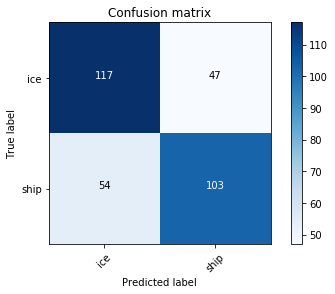

In [13]:
from sklearn.metrics import confusion_matrix
y_predicted= np.argmax(preds,axis=1)
cm = confusion_matrix(y, y_predicted)


plot_confusion_matrix(cm, data.classes)

---

## View images

In [18]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

Band 1


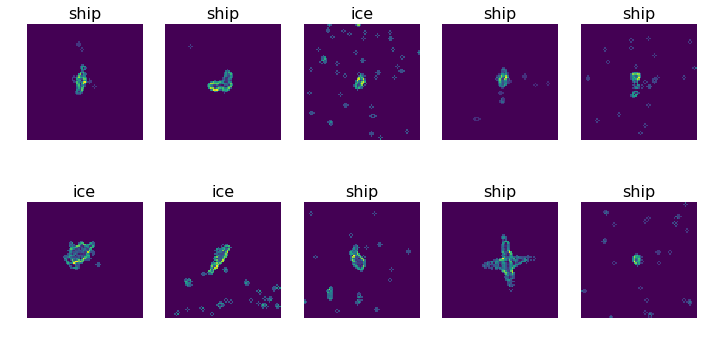

In [19]:
print("Band 1")
plots(X_all[:,:,:,0],rows=2, titles=y_classes)

Band 2


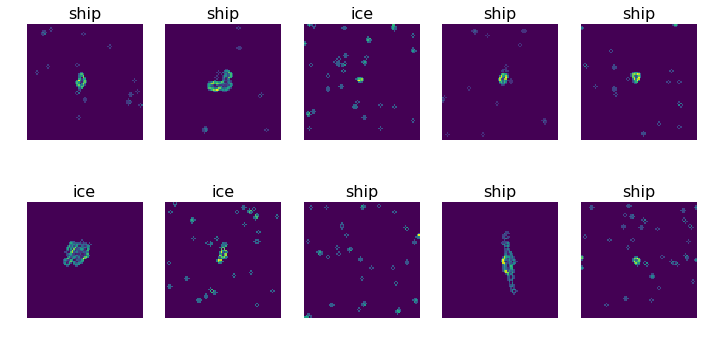

In [20]:
print("Band 2")
plots(X_all[:,:,:,1],rows=2, titles=y_classes)

Band 3


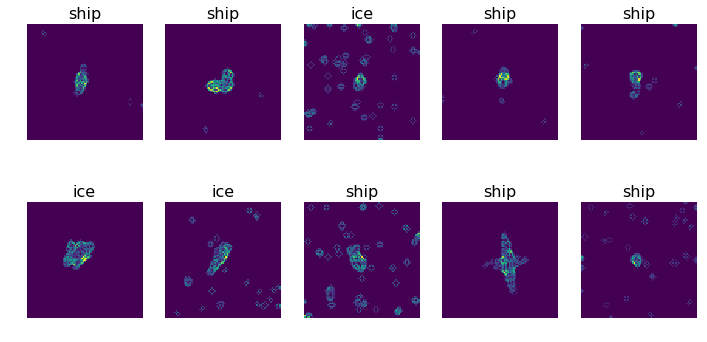

In [21]:
print("Band 3")
plots(X_all[:,:,:,2],rows=2, titles=y_classes)

All Bands


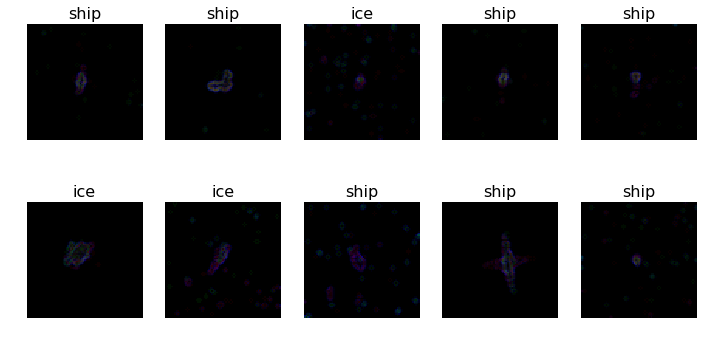

In [22]:
print("All Bands")
plots(X_all[:,:,:],rows=2, titles=y_classes)

In [24]:
# see breakdown of classes in training dataset
train_df['is_iceberg'].value_counts()

0    851
1    753
Name: is_iceberg, dtype: int64

In [27]:
# get percents
train_df['is_iceberg'].value_counts(normalize=True)

0    0.530549
1    0.469451
Name: is_iceberg, dtype: float64

---
# test set prediction

In [57]:
log_preds,y = learn.TTA(is_test=True)
probs = np.exp(log_preds)

In [61]:
probs.shape

(5, 8424, 2)

In [94]:
def make_test_file(probs,test_df):
    probs = np.mean(probs,axis=0)
    df = pd.DataFrame(probs)
    df.columns = data.classes
    df['id'] = test_df['id']
    df=df.drop('ship',axis=1)
    df=df.rename(columns={'ice':'is_iceberg'})
    SUBM = f'{PATH}sub/'
    os.makedirs(SUBM, exist_ok=True)
    df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)
    FileLink(f'{SUBM}subm.gz')
    

In [95]:
make_test_file(probs,test_df)